In [13]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
import matplotlib.pyplot as plt

In [112]:
distances = pd.read_csv("distancias_representativas_solar.csv")
substations = pd.read_csv("subestaciones_w_lz.csv")
del substations['Unnamed: 0']
del substations['id']
substations = substations.sort_values(by = ['lz'], ascending = [True])

### Example: Number of subclusters in loadzone 1 and its centroids.

In [118]:
# First, we get all the existing substations in the loadzone.
X = []
Y = []
sub_lz_1 = []

for i, row in substations.iterrows():
    if (row['lz'] == 1.0):
        sub_lz_1.append((row['X'], row['Y']))
        X.append(row['X'])
        Y.append(row['Y'])
        
df = pd.DataFrame (index = [i for i in range(0, len(X))], columns = ['X', 'Y'])
df['X'] = X
df['Y'] = Y

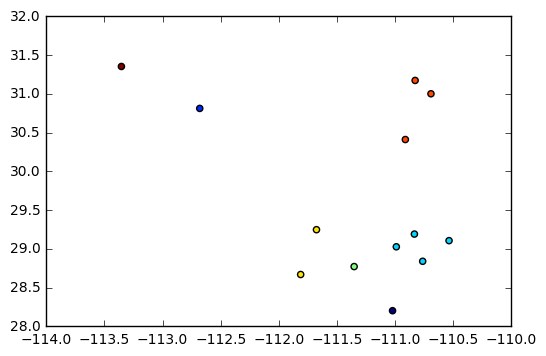

In [119]:
# We can see the location of each substation as a point in the plane. Thus, if we set the known representative 
# distance of each particular loadzone as a radius around each of the points (i.e., each of the substations),
# we will have several circles inside a loadzone, each of which has radius r, being r the representative distance
# of the loadzone (distances.iloc[0]['km']).

# Using DBSCAN clustering, we get the subclusters inside a loadzone. Note that a single substation can itself be a
# subcluster; it wouldn't be beneficial to ignore this substations since very different energy-generation
# profiles can exists among the same loadzone and we want to take them into account.
# https://en.wikipedia.org/wiki/DBSCAN

distance_matrix = squareform(pdist(sub_lz_1, (lambda u, v: great_circle(u, v).kilometers)))
db = DBSCAN(eps = 2 * distances.iloc[0]['km'] + 1, min_samples = 1, metric = 'precomputed')
y_db = db.fit_predict(distance_matrix)
cluster = y_db

df['cluster'] = cluster
df = df.drop(df[df.cluster == -1].index)

plt.scatter(df['X'], df['Y'], c = df['cluster'])
plt.show()

In [103]:
centroids = []

i = 0
while True:
    _df = df.loc[df['cluster'] == i]
    
    if _df.empty:
        break
    centroids.append((((sum(_df['X'])/len(_df.index)), (sum(_df['Y']))/len(_df.index)), i))
    i = i + 1
    
centroids

[((-113.353956419933, 31.354298903843304), 0),
 ((-112.68015268554301, 30.813313964394197), 1),
 ((-110.80991539713868, 30.862825520562001), 2),
 ((-110.78022052102351, 29.041828301270424), 3),
 ((-111.74395422766351, 28.959341861253698), 4),
 ((-111.35198186294599, 28.772507541671299), 5),
 ((-111.021558877812, 28.203070149368898), 6)]

### Computing the subclusters for every loadzone.
And their respective centroids.

In [124]:
centroids = []

for s in range(1, 54):
    X = []
    Y = []
    sub_lz = []

    for i, row in substations.iterrows():
        if (row['lz'] == s):
            sub_lz.append((row['X'], row['Y']))
            X.append(row['X'])
            Y.append(row['Y'])
        
    df = pd.DataFrame (index = [i for i in range(0, len(X))], columns = ['X', 'Y'])
    df['X'] = X
    df['Y'] = Y
    
    distance_matrix = squareform(pdist(sub_lz, (lambda u, v: great_circle(u, v).kilometers)))
    db = DBSCAN(eps = 2 * distances.iloc[s-1]['km'] + 1, min_samples = 1, metric = 'precomputed')
    y_db = db.fit_predict(distance_matrix)
    cluster = y_db

    df['cluster'] = cluster
    df = df.drop(df[df.cluster == -1].index)

    i = 0
    while True:
        _df = df.loc[df['cluster'] == i]
    
        if _df.empty:
            break
        
        centroids.append(((sum(_df['X'])/len(_df.index)), (sum(_df['Y']))/len(_df.index), s, i))
        
        i = i + 1

In [125]:
centroids

[(-111.021558877812, 28.203070149368898, 1, 0),
 (-112.68015268554301, 30.813313964394197, 1, 1),
 (-110.78022052102349, 29.041828301270428, 1, 2),
 (-111.35198186294599, 28.772507541671299, 1, 3),
 (-111.74395422766351, 28.959341861253698, 1, 4),
 (-110.80991539713868, 30.862825520562001, 1, 5),
 (-113.353956419933, 31.354298903843304, 1, 6),
 (-110.3898678768215, 30.637868845212147, 2, 0),
 (-109.85536010675202, 30.442361936117599, 2, 1),
 (-110.10479706611801, 30.481599778859248, 2, 2),
 (-109.3597256290515, 30.151567235599849, 2, 3),
 (-109.13620419793199, 29.829031531804301, 2, 4),
 (-109.71714395610768, 27.485027006351569, 3, 0),
 (-108.915922207842, 28.197360299746901, 3, 1),
 (-107.77563896502799, 28.471088201195503, 3, 2),
 (-109.23986631091449, 27.095386407727098, 3, 3),
 (-110.367191789606, 28.687288020593599, 3, 4),
 (-108.35225946849701, 28.328609572211999, 3, 5),
 (-108.39761164292699, 25.848515021398001, 4, 0),
 (-109.15564084411601, 26.638883984521499, 4, 1),
 (-107.976